In [564]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#Read CSV file using pandas

df = pd.read_csv('dataR2.csv')



In [565]:
#check if any coloumn is null
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [566]:
#Split the healthy and patient group

df_healthy = df[df['Classification'] == 1]
df_patient = df[df['Classification'] == 2]


In [567]:
#Descriptive Statistics
df1 = df_healthy.drop(columns='Classification', axis=1)

In [568]:
df2 = df_patient.drop(columns='Classification', axis=1)

In [569]:
df4 = pd.concat([df_healthy, df_patient], axis=0, ignore_index=False)
df4['col'] = (len(df_healthy)*('healthy',) + len(df_patient)*('patient',))
df4.reset_index(inplace=False)



,index,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,col
0,0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,healthy
1,1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,healthy
2,2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,healthy
3,3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,healthy
4,4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
111,111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,patient
112,112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,patient
113,113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,patient
114,114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,patient


<AxesSubplot:>

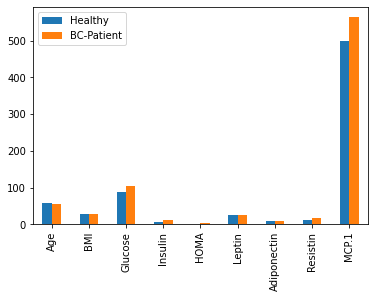

In [570]:
pd.concat({
    'Healthy': df1.mean(), 'BC-Patient': df2.mean()
}, axis=1).plot.bar()

In [571]:
X = df.iloc[:, 0:9].values
Y = df.iloc[:, 9].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [572]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [573]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [574]:
#Using Logistic Regression Algorithm to the Training Set

In [575]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
classifier1 = KNeighborsClassifier(n_neighbors = 3, p = 2)
model = classifier1.fit(X_train, Y_train)
Y_pred = classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
cm = confusion_matrix(Y_test, Y_pred)
print (cm)
a, b, c = roc_curve(Y_test, Y_pred, pos_label=2)
d = classification_report(Y_test, Y_pred)
print (d)
#List Hyperparameters that we want to tune.
#leaf_size = list(range(1,50))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,Y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


[[ 9  3]
 [ 5 12]]
              precision    recall  f1-score   support

           1       0.64      0.75      0.69        12
           2       0.80      0.71      0.75        17

    accuracy                           0.72        29
   macro avg       0.72      0.73      0.72        29
weighted avg       0.73      0.72      0.73        29

Best p: 2
Best n_neighbors: 3
